In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib nbagg

In [2]:
with open('temperature1.csv', 'r') as f:
    t_measure = [float(x.strip()) for x in f.readlines()]

<IPython.core.display.Javascript object>


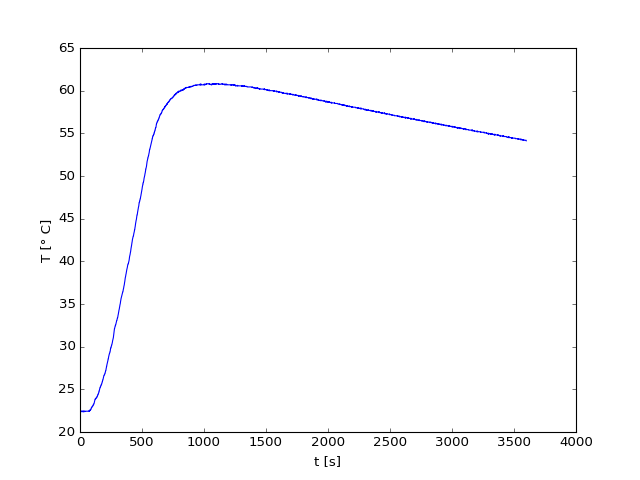

In [3]:
plt.figure()
plt.plot(t_measure)
plt.xlabel('t [s]')
plt.ylabel('T [° C]')

In [30]:
c_pw = 4200
c_ph = 400

h_w = 25
h_a = 6

m_w = 2
m_h = 0.2

T_env = 23
P = 400

rho_w = 1000
rho_h = 8800

r = 0.085

In [31]:
A_hw = np.pi * r ** 2
V_w = m_w / rho_w
H_w = V_w / A_hw
A_wa = H_w * 2 * r * np.pi + A_hw

V_h = m_h / rho_h
H_h = V_h / A_hw
A_ha = H_h * 2 * r * np.pi + A_hw

In [32]:
alpha = -(h_w * A_hw + h_a * A_ha) / (c_ph * m_h)
beta = h_w * A_hw / (c_ph * m_h)
gamma = h_w * A_hw / (c_pw * m_w)
delta = -(h_w * A_hw + h_a * A_wa) / (c_pw * m_w)

A = np.array([[alpha, beta], [gamma, delta]])
A

array([[ -8.83558463e-03,   7.09312716e-03],
       [  6.75535920e-05,  -1.17379899e-04]])

In [7]:
alpha = P / (c_ph * m_h)
beta = h_a * A_ha / (c_ph * m_h) * T_env
gamma = 0
delta = h_a * A_wa / (c_pw * m_w) * T_env

B = np.array([[alpha, beta], [gamma, delta]])
B

array([[  5.00000000e+00,   4.00765218e-02],
       [  0.00000000e+00,   1.14600507e-03]])

In [8]:
u = np.array([[0, 1]]).transpose()

In [9]:
initial_state = np.array([[T_env] * 2]).transpose()

In [10]:
state = np.float64(initial_state)

In [11]:
u = np.array([[1, 1]]).transpose()

In [12]:
dt = 0.01
T1 = 522
T = 3600

In [13]:
num_steps = int(T / dt)
evolution = np.zeros((num_steps, len(state)))

In [14]:
for t in tqdm_notebook(range(int(T1 / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[t, :] = state.transpose()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [15]:
u = np.array([[0, 1]]).transpose()

In [16]:
for t in tqdm_notebook(range(int((T - T1) / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[int(T1 / dt) + t, :] = state.transpose()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [17]:
evolution[int(T1 / dt), 1], max(evolution[:, 1])

(38.387767526750267, 42.041774560573877)

<IPython.core.display.Javascript object>


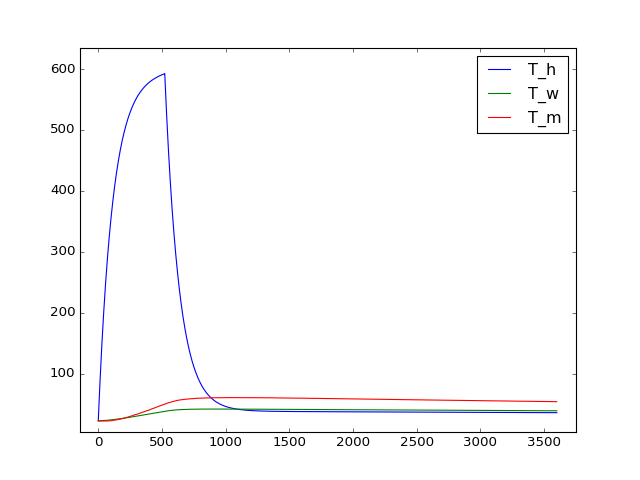

(0, 100)

In [18]:
plt.figure()
#plt.plot(evolution[:, ::] / (c_p * m_x))
plt.plot(np.arange(len(evolution)) * dt, evolution[:, ::])
plt.plot(t_measure)
plt.legend(['T_h', 'T_w', 'T_m'])
plt.ylim(0, 100)

In [38]:
class WaterHeaterModel:
    def __init__(self, m_w=1, m_h=0.2, T_env=23, P=400, r=0.085,
                 c_pw=4200, c_ph=400, h_w=25, h_a=6, rho_w=1000, rho_h=8800):
        A_hw = np.pi * r ** 2
        V_w = m_w / rho_w
        H_w = V_w / A_hw
        A_wa = H_w * 2 * r * np.pi + A_hw

        V_h = m_h / rho_h
        H_h = V_h / A_hw
        A_ha = H_h * 2 * r * np.pi + A_hw

        alpha = -(h_w * A_hw + h_a * A_ha) / (c_ph * m_h)
        beta = h_w * A_hw / (c_ph * m_h)
        gamma = h_w * A_hw / (c_pw * m_w)
        delta = -(h_w * A_hw + h_a * A_wa) / (c_pw * m_w)

        self.A = np.array([[alpha, beta], [gamma, delta]])

        alpha = P / (c_ph * m_h)
        beta = h_a * A_ha / (c_ph * m_h) * T_env
        gamma = 0
        delta = h_a * A_wa / (c_pw * m_w) * T_env

        self.B = np.array([[alpha, beta], [gamma, delta]])
        
        self.state = np.array([[T_env] * 2], dtype=np.float64).transpose()

    def __call__(self, u, dt):
        u = np.array([[u, 1]]).transpose()
        
        self.state += (np.dot(self.A, self.state) + np.dot(self.B, u)) * dt
        
        return self.state

<IPython.core.display.Javascript object>


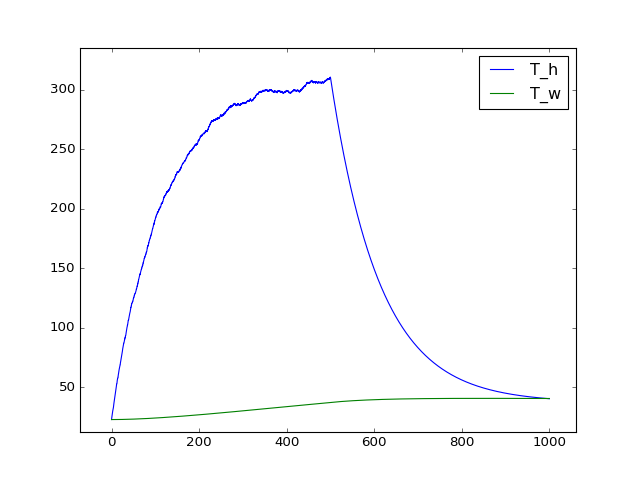

(0, 100)

In [57]:
model = WaterHeaterModel()

dt = 0.1
T = 1000

temp = np.array([model(np.random.rand(1)[0] if t * dt < 500 else 0, dt)[:, 0].copy() for t in range(int(T / dt))])

plt.figure()
plt.plot(np.arange(len(temp)) * dt, temp)
plt.legend(['T_h', 'T_w'])
plt.ylim(0, 100)